In [1]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import clear_output

import json

import warnings

from sklearn import preprocessing

In [2]:
MODEL_FILE = "1.1. Esembler_Logistic_Application.json"

In [3]:
# logistische Regression
LOG_PARAMS = {
    "random_state" : 0,
    "max_iter" : 500,
    "n_jobs" : -1
}

In [4]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [5]:
# Check if Models exists

In [6]:
model_path = DATASET_DIR / "Models" / MODEL_FILE
MODEL_EXIST = model_path.is_file()

In [7]:
# Daten

In [8]:
app_train = pd.read_csv(DATASET_DIR / "4. FillNA" / "application.csv")
app_train = app_train.set_index("SK_ID_CURR")

In [9]:
app_train.head()

,TARGET,A_CODE_GENDER,A_NAME_INCOME_TYPE,A_NAME_EDUCATION_TYPE,A_FLAG_EMP_PHONE,A_OCCUPATION_TYPE,A_REGION_RATING_CLIENT,A_REG_CITY_NOT_WORK_CITY,A_ORGANIZATION_TYPE,A_FLAG_DOCUMENT_3,A_CNT_CHILDREN,A_OBS_60_CNT_SOCIAL_CIRCLE,A_DEF_60_CNT_SOCIAL_CIRCLE,A_AMT_REQ_CREDIT_BUREAU_HOUR,A_AMT_REQ_CREDIT_BUREAU_DAY,A_AMT_REQ_CREDIT_BUREAU_WEEK,A_AMT_REQ_CREDIT_BUREAU_MON,A_AMT_REQ_CREDIT_BUREAU_QRT,A_AMT_REQ_CREDIT_BUREAU_YEAR,A_AMT_INCOME_TOTAL,A_AMT_CREDIT,A_AMT_ANNUITY,A_REGION_POPULATION_RELATIVE,A_DAYS_BIRTH,A_DAYS_EMPLOYED,A_DAYS_REGISTRATION,A_DAYS_ID_PUBLISH,A_EXT_SOURCE_1,A_EXT_SOURCE_2,A_EXT_SOURCE_3,A_BASEMENTAREA_AVG,A_YEARS_BEGINEXPLUATATION_AVG,A_LANDAREA_AVG,A_NONLIVINGAREA_AVG,A_TOTALAREA_MODE,A_CREDIT/INCOME
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,202500.0,406597.5,24700.5,0.018801,-9461.0,-637.0,-3648.0,-2120.0,0.083037,0.262949,0.139376,0.036900,0.972200,0.036900,0.000000,0.014900,2.007889
100003,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270000.0,1293502.5,35698.5,0.003541,-16765.0,-1188.0,-1186.0,-291.0,0.311267,0.622246,0.344844,0.052900,0.985100,0.013000,0.009800,0.071400,4.790750
100004,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67500.0,135000.0,6750.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,0.550824,0.555912,0.729567,0.075009,0.981667,0.067504,0.021810,0.088649,2.000000
100006,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.008068,0.005653,0.044626,0.213765,0.250421,2.217301,135000.0,312682.5,29686.5,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,0.666039,0.650442,0.565898,0.076735,0.979744,0.068598,0.017830,0.082112,2.316167
100007,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121500.0,513000.0,21865.5,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,0.559619,0.322738,0.571390,0.071043,0.982023,0.048938,0.021351,0.076234,4.222222


In [10]:
# Ermittlung Reihenfolge

In [11]:
y = app_train["TARGET"]
x = app_train.drop(["TARGET"], axis=1)

In [12]:
x_col = x.columns
x_idx = x.index

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x)
x.columns = x_col
x.index = x_idx
x.head()

,A_CODE_GENDER,A_NAME_INCOME_TYPE,A_NAME_EDUCATION_TYPE,A_FLAG_EMP_PHONE,A_OCCUPATION_TYPE,A_REGION_RATING_CLIENT,A_REG_CITY_NOT_WORK_CITY,A_ORGANIZATION_TYPE,A_FLAG_DOCUMENT_3,A_CNT_CHILDREN,A_OBS_60_CNT_SOCIAL_CIRCLE,A_DEF_60_CNT_SOCIAL_CIRCLE,A_AMT_REQ_CREDIT_BUREAU_HOUR,A_AMT_REQ_CREDIT_BUREAU_DAY,A_AMT_REQ_CREDIT_BUREAU_WEEK,A_AMT_REQ_CREDIT_BUREAU_MON,A_AMT_REQ_CREDIT_BUREAU_QRT,A_AMT_REQ_CREDIT_BUREAU_YEAR,A_AMT_INCOME_TOTAL,A_AMT_CREDIT,A_AMT_ANNUITY,A_REGION_POPULATION_RELATIVE,A_DAYS_BIRTH,A_DAYS_EMPLOYED,A_DAYS_REGISTRATION,A_DAYS_ID_PUBLISH,A_EXT_SOURCE_1,A_EXT_SOURCE_2,A_EXT_SOURCE_3,A_BASEMENTAREA_AVG,A_YEARS_BEGINEXPLUATATION_AVG,A_LANDAREA_AVG,A_NONLIVINGAREA_AVG,A_TOTALAREA_MODE,A_CREDIT/INCOME
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,-1.388135,-0.889689,-0.570906,0.468697,-0.595378,-0.103064,-0.547236,-0.880189,0.639065,-0.577538,0.250550,5.253078,-0.082499,-0.067833,-0.180659,-0.309534,-0.358336,-0.513659,0.477100,-0.486449,-0.150977,-0.149452,1.506880,0.976145,0.371759,0.493636,-2.381600,-1.317275,-2.081804,-0.913527,-1.645075,-0.546229,-0.731401,-1.123316,-0.768301
100003,0.720307,-0.063874,1.061891,0.468697,-0.334305,-2.067573,-0.547236,-0.787990,0.639065,-0.577538,-0.170345,-0.276473,-0.082499,-0.067833,-0.180659,-0.309534,-0.358336,-1.087507,1.327729,1.839008,0.686349,-1.252750,-0.166821,0.703365,1.100478,1.841007,-1.174945,0.565018,-0.925030,-0.558134,0.581163,-1.130976,-0.403123,-0.294048,0.367610
100004,-1.388135,-0.889689,-0.570906,0.468697,-0.595378,-0.103064,-0.547236,-0.695790,-1.564786,-0.577538,-0.591239,-0.276473,-0.082499,-0.067833,-0.180659,-0.309534,-0.358336,-1.087507,-1.224157,-1.198575,-1.517626,-0.783451,-0.689509,1.180111,0.190615,0.190864,0.091593,0.217508,1.240933,-0.067049,-0.011309,0.202538,-0.000802,-0.040886,-0.771521
100006,0.720307,-0.889689,-0.570906,0.468697,-0.595378,-0.103064,-0.547236,-0.880189,0.639065,-0.577538,0.250550,-0.276473,0.020951,-0.012958,0.053738,-0.058932,-0.019288,0.184887,-0.373528,-0.732693,0.228629,-0.928991,-0.680114,-0.212998,-1.458920,0.260111,0.700737,0.712731,0.319486,-0.028703,-0.343233,0.229300,-0.134125,-0.136830,-0.642468
100007,-1.388135,-0.889689,-0.570906,0.468697,-0.334305,-0.103064,1.827367,-0.603590,-1.564786,-0.577538,-0.591239,-0.276473,-0.082499,-0.067833,-0.180659,-0.309534,-0.358336,-1.087507,-0.543654,-0.207463,-0.366817,0.563570,-0.892535,-0.212503,0.175519,-0.492030,0.138093,-1.004047,0.350409,-0.155149,0.050158,-0.251697,-0.016195,-0.223103,0.135548


In [13]:
if not MODEL_EXIST:
    # unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

    model = LogisticRegression(**LOG_PARAMS).fit(x_train, y_train)

    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    print(auc)

    # Koeffizienten der einzelnen Klassen
    coef_dict = {}
    for coef, feat in zip(model.coef_[0], x.columns.values):
        coef_dict[feat] = np.abs(coef)

    # Feature Importance
    d = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))
    order = list(d.keys())
    
    model_data = {
    "todo" : order,
    "keep" : [],
    "drop" : [],
    "params" : LOG_PARAMS,
    "auc" : [],
    "p" : [],
    "n" : []
    }
    
    auc_temp = 0.5

In [14]:
if MODEL_EXIST:
    with open(DATASET_DIR / "Models" / MODEL_FILE, 'r') as file:
        model_data = json.load(file)
    auc_temp = model_data["auc"][-1]

In [15]:
#Logistische Regression Parameterbestimmung

In [16]:
df = app_train

print('auc: %s, todo: %s, keep: %s, drop: %s' % (round(auc_temp,4), len(model_data["todo"]), len(model_data["keep"]), len(model_data["drop"])))
todo = model_data["todo"].copy()

for head in todo:
    
    model_data["keep"].append(head)
    
    X = df[model_data["keep"]]
    y = df["TARGET"]
    x = X
    
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    
    model = LogisticRegression(**LOG_PARAMS).fit(x, y)
    
    aucs = []

    kfold = KFold(5, shuffle=True, random_state=1)

    for train, test in kfold.split(x):
        model.fit(x[train], y.iloc[train])
        auc = roc_auc_score(y.iloc[test], model.predict_proba(x[test])[:,1])
        aucs.append(auc)
    
    auc = np.mean(aucs)
    n = len(X)
    p = len(X.columns) - 1 # dont count Target
    
    if auc > auc_temp:
        
        model_data["auc"].append(auc)
        model_data["p"].append(p)
        model_data["n"].append(n)
        
        auc_temp = auc
        
    else:
        model_data["keep"].remove(head)
        model_data["drop"].append(head)
    
    model_data["todo"].remove(head)
    
    with open(DATASET_DIR / "Models" / MODEL_FILE, 'w') as file:
        json.dump(model_data, file)
    
    clear_output(wait=True)
    print('auc: %s, todo: %s, keep: %s, drop: %s' % (round(auc,4), len(model_data["todo"]), len(model_data["keep"]), len(model_data["drop"])))

auc: 0.7868, todo: 0, keep: 29, drop: 6


         auc   p       n
28  0.786799  28  307511


<AxesSubplot:>

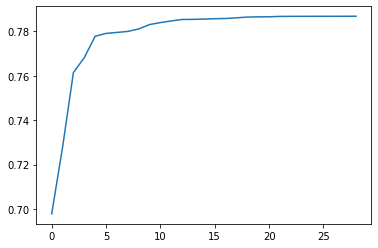

In [17]:
data = {
    "auc" : model_data["auc"],
    "p" : model_data["p"],
    "n" : model_data["n"]
}

result = pd.DataFrame(data)

print(result[result["auc"] == result["auc"].max()])
result["auc"].plot()

In [18]:
model_data["keep"]

['A_EXT_SOURCE_1',
 'A_DAYS_BIRTH',
 'A_EXT_SOURCE_3',
 'A_LANDAREA_AVG',
 'A_EXT_SOURCE_2',
 'A_TOTALAREA_MODE',
 'A_AMT_CREDIT',
 'A_AMT_ANNUITY',
 'A_CREDIT/INCOME',
 'A_CODE_GENDER',
 'A_DAYS_EMPLOYED',
 'A_FLAG_DOCUMENT_3',
 'A_REGION_POPULATION_RELATIVE',
 'A_BASEMENTAREA_AVG',
 'A_REGION_RATING_CLIENT',
 'A_YEARS_BEGINEXPLUATATION_AVG',
 'A_ORGANIZATION_TYPE',
 'A_FLAG_EMP_PHONE',
 'A_DEF_60_CNT_SOCIAL_CIRCLE',
 'A_NAME_INCOME_TYPE',
 'A_AMT_INCOME_TOTAL',
 'A_AMT_REQ_CREDIT_BUREAU_QRT',
 'A_DAYS_ID_PUBLISH',
 'A_AMT_REQ_CREDIT_BUREAU_DAY',
 'A_AMT_REQ_CREDIT_BUREAU_HOUR',
 'A_AMT_REQ_CREDIT_BUREAU_MON',
 'A_AMT_REQ_CREDIT_BUREAU_YEAR',
 'A_OBS_60_CNT_SOCIAL_CIRCLE',
 'A_OCCUPATION_TYPE']

In [19]:
model_data["drop"]

['A_DAYS_REGISTRATION',
 'A_NONLIVINGAREA_AVG',
 'A_CNT_CHILDREN',
 'A_AMT_REQ_CREDIT_BUREAU_WEEK',
 'A_NAME_EDUCATION_TYPE',
 'A_REG_CITY_NOT_WORK_CITY']

In [20]:
model = LogisticRegression(**LOG_PARAMS)

aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df[model_data["keep"]]

X = df[model_data["keep"] + ["TARGET"]]
y = X["TARGET"]
x = X.drop(["TARGET"], axis=1)

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

for train, test in kfold.split(x):
    model.fit(x[train], y.iloc[train])
    auc = roc_auc_score(y.iloc[test], model.predict_proba(x[test])[:,1])
    aucs.append(auc)
    
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.4f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.7928243509844732
train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.7855698178420664
train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.7853722573539494
train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.7861930041568123
train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.7840356608614079


Durchschnitt: 0.7868
Standardabw.: 0.00
Varianz:      0.00


In [21]:
len(model_data["keep"])

29